# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | brandon
Processing Record 5 of Set 1 | tura
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | ebaye
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | estevan
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | minas de marcona
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | blackmans bay
Processing Record

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,288.84,65,91,7.06,AU,1730773364
1,waitangi,-43.9535,-176.5597,284.06,68,61,7.44,NZ,1730773365
2,olonkinbyen,70.9221,-8.7187,271.99,86,100,10.32,SJ,1730773367
3,brandon,27.9378,-82.2859,296.99,93,0,3.09,US,1730773368
4,tura,25.5198,90.2201,297.07,76,51,0.86,IN,1730773369


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,288.84,65,91,7.06,AU,1730773364
1,waitangi,-43.9535,-176.5597,284.06,68,61,7.44,NZ,1730773365
2,olonkinbyen,70.9221,-8.7187,271.99,86,100,10.32,SJ,1730773367
3,brandon,27.9378,-82.2859,296.99,93,0,3.09,US,1730773368
4,tura,25.5198,90.2201,297.07,76,51,0.86,IN,1730773369


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

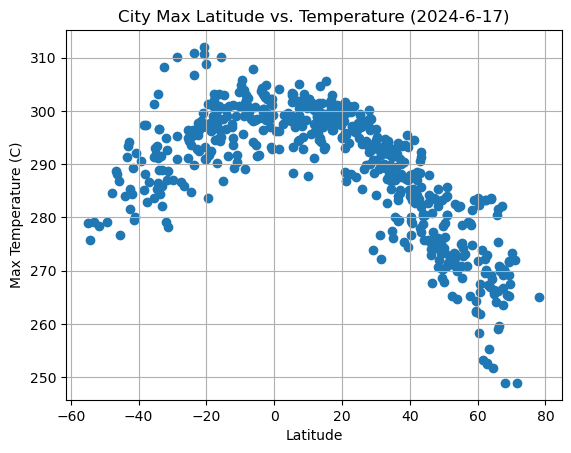

In [11]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-6-17)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

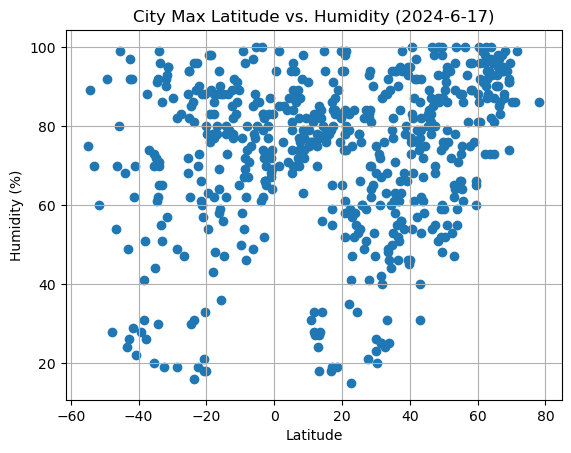

In [12]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Max Latitude vs. Humidity (2024-6-17)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

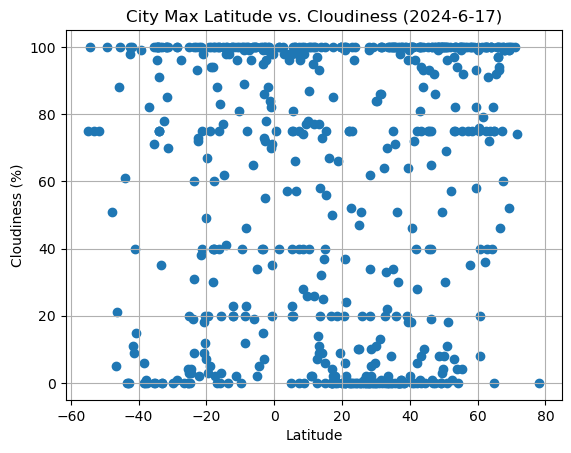

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Max Latitude vs. Cloudiness (2024-6-17)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

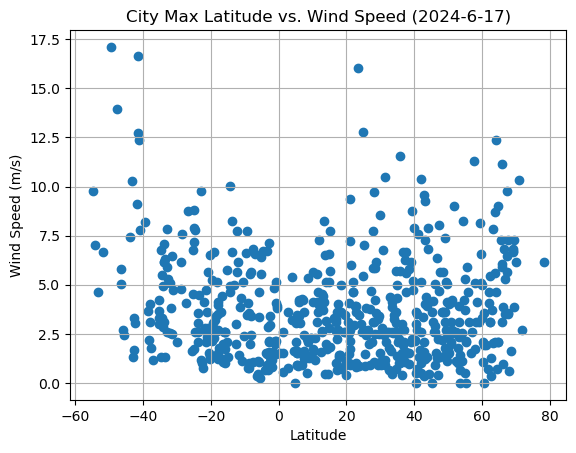

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Max Latitude vs. Wind Speed (2024-6-17)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
# Perform linear regression
from scipy import stats


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,271.99,86,100,10.32,SJ,1730773367
3,brandon,27.9378,-82.2859,296.99,93,0,3.09,US,1730773368
4,tura,25.5198,90.2201,297.07,76,51,0.86,IN,1730773369
6,ebaye,8.7748,167.7392,303.16,74,0,2.06,MH,1730773371
7,iskateley,67.6803,53.1512,270.20,87,99,3.55,RU,1730773372


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,288.84,65,91,7.06,AU,1730773364
1,waitangi,-43.9535,-176.5597,284.06,68,61,7.44,NZ,1730773365
5,adamstown,-25.0660,-130.1015,294.28,82,100,7.87,PN,1730773370
13,port-aux-francais,-49.3500,70.2167,279.12,92,100,17.11,TF,1730773379
16,hithadhoo,-0.6000,73.0833,301.15,69,20,3.83,MV,1730773384


###  Temperature vs. Latitude Linear Regression Plot

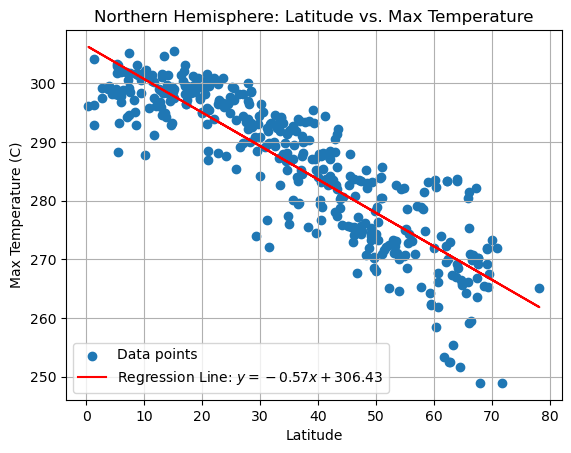

Slope: -0.5701888269062173
Intercept: 306.42968656398256
R-squared: 0.7659736000031825
P-value: 1.778126254362408e-123
Standard Error: 0.016062526727876777


In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere: Latitude vs. Max Temperature')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

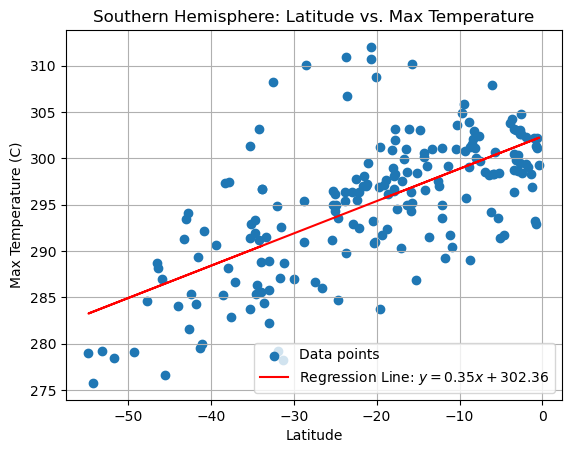

Slope: 0.3487060207950979
Intercept: 302.35908187196816
R-squared: 0.42747344280118127
P-value: 6.485147545179584e-25
Standard Error: 0.02920021245130288


In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere: Latitude vs. Max Temperature')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

**Discussion about the linear relationship:** From the data provided it appears the closer to the equator the location is the higher the max temp will be, this is true for both Northern and Southern Hemispheres. 

### Humidity vs. Latitude Linear Regression Plot

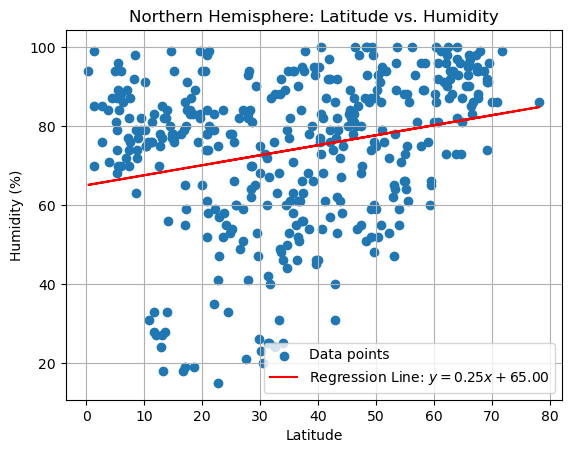

Slope: 0.25307248130944376
Intercept: 65.00319500586357
R-squared: 0.061840298526152256
P-value: 7.260270314114371e-07
Standard Error: 0.050236243490965164


In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

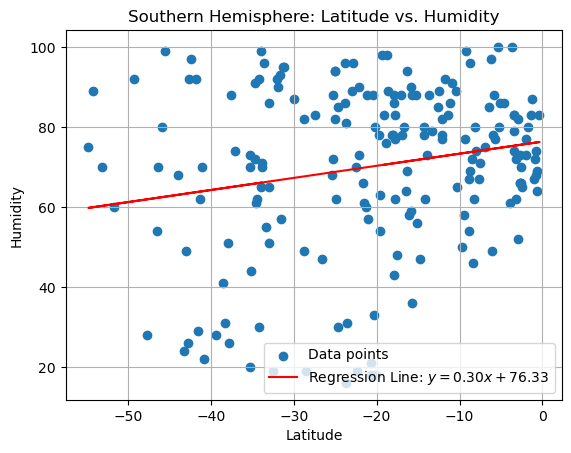

Slope: 0.3024401917794117
Intercept: 76.33259819669485
R-squared: 0.039803841649886894
P-value: 0.005407771794464193
Standard Error: 0.10748313081751752


In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

**Discussion about the linear relationship:** The data for humidity shows a similar relationship to tempature with slightly less slope, but the overall data shows that the closer to the equator the location is the higher the humidty is for both northern and sounthern hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot

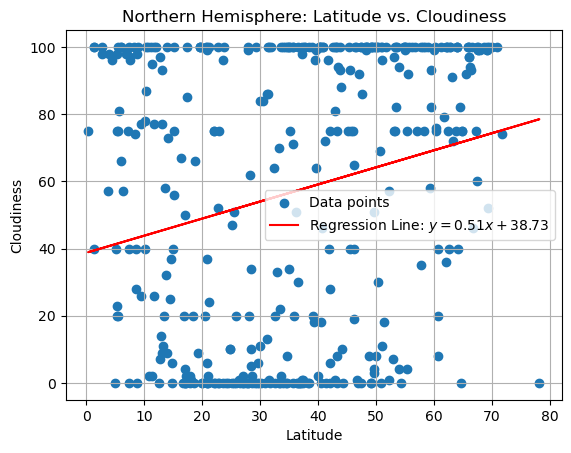

Slope: 0.508212938160745
Intercept: 38.7306467763768
R-squared: 0.0539038711316629
P-value: 3.9156270915389065e-06
Standard Error: 0.10851081053122666


In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

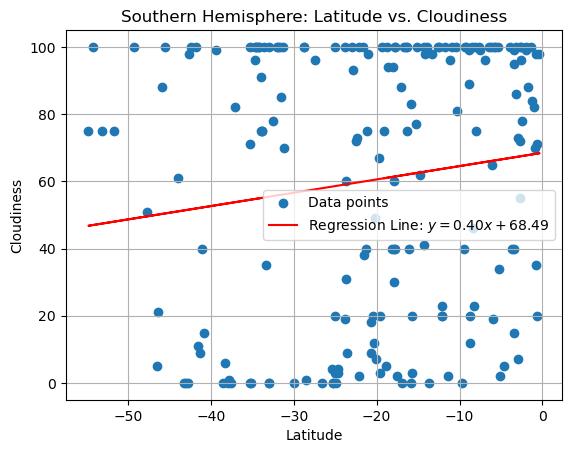

Slope: 0.39639725389784886
Intercept: 68.49372807626823
R-squared: 0.0189107676096953
P-value: 0.05650773468259093
Standard Error: 0.20659206151354698


In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

**Discussion about the linear relationship:** When comparing the data for cloudiness from both northern and southern hemispheres there most data points are wide spread on each hemisphere but looking at the data together there is an indication that cloudiness over all increases from the southern hemisphere through the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

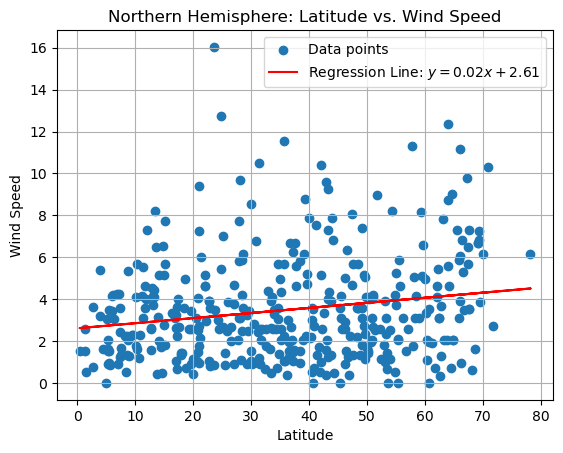

Slope: 0.02429150300831907
Intercept: 2.608130941226608
R-squared: 0.03426642853354696
P-value: 0.0002507492425978793
Standard Error: 0.006572313420222667


In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

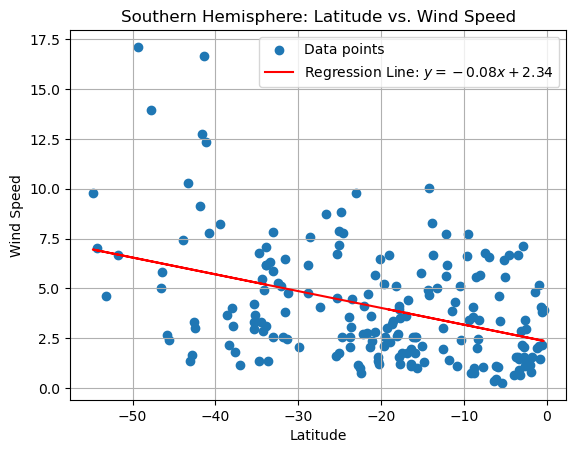

Slope: -0.08416045978692151
Intercept: 2.338953067643038
R-squared: 0.15999428388701017
P-value: 8.25368561467678e-09
Standard Error: 0.013953408315394298


In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = slope * x_values + intercept

# Plot the data
plt.scatter(x_values, y_values, label="Data points")
plt.plot(x_values, regress_values, color="red", label=f"Regression Line: $y={slope:.2f}x + {intercept:.2f}$")

# Label the plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {rvalue**2}")
print(f"P-value: {pvalue}")
print(f"Standard Error: {stderr}")

**Discussion about the linear relationship:** For wind speed over all the data is mainly showing a trend of low points on both the northern and souther hemisphere but there is a slight slope that increases as the locations move away from the equator and this is present for both northern and southern hemispheres. 